In [1]:
!pip install mglearn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Libraries for Analysis
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn
import matplotlib.pyplot as plt
import scipy.io

# Allow plots to appear in the notebook
%matplotlib inline

# Libraries for Visuals
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm
from sklearn.svm import SVC
import seaborn as sns; sns.set(font_scale = 1.2)
import csv
linear_regression_model = LinearRegression() # Pass any parameters
knn = KNeighborsClassifier(n_neighbors=3)
from pandas.plotting import scatter_matrix

Python version: 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
pandas version: 0.23.4
matplotlib version: 3.0.0
NumPy version: 1.16.2
SciPy version: 1.1.0
IPython version: 7.1.1
scikit-learn version: 0.20.3


## Read Data

In [3]:
# Read the PV System Power
pv = pd.read_csv('Ali PV NoGraph CSV.csv')
print("Keys of pv: \n{}".format(pv.keys()))

Keys of pv: 
Index(['Time', 'PV Profile', 'PV Status'], dtype='object')


In [4]:
pv_half = pv[0:8760:2]

In [5]:
pv_third = pv[0:8760:3]

In [6]:
pv.head()

,Time,PV Profile,PV Status
0,0.0,0.0,0
1,1.0,0.0,0
2,2.0,0.0,0
3,3.0,0.0,0
4,4.0,0.0,0


In [7]:
pv_half.head()

,Time,PV Profile,PV Status
0,0.0,0.000000,0
2,2.0,0.000000,0
4,4.0,0.000000,0
6,6.0,0.000000,0
8,8.0,0.293681,1


In [8]:
pv_third.head()

,Time,PV Profile,PV Status
0,0.0,0.000000,0
3,3.0,0.000000,0
6,6.0,0.000000,0
9,9.0,0.539266,1
12,12.0,0.778423,1


In [9]:
pv.tail()

,Time,PV Profile,PV Status
8756,20.0,0.0,0
8757,21.0,0.0,0
8758,22.0,0.0,0
8759,23.0,0.0,0
8760,0.0,0.0,0


In [10]:
pv_half.tail()

,Time,PV Profile,PV Status
8750,14.0,0.234879,1
8752,16.0,0.036895,1
8754,18.0,0.000000,0
8756,20.0,0.000000,0
8758,22.0,0.000000,0


In [11]:
pv_third.tail()

,Time,PV Profile,PV Status
8745,9.0,0.307135,1
8748,12.0,0.413563,1
8751,15.0,0.272777,1
8754,18.0,0.000000,0
8757,21.0,0.000000,0


## Plotting Data

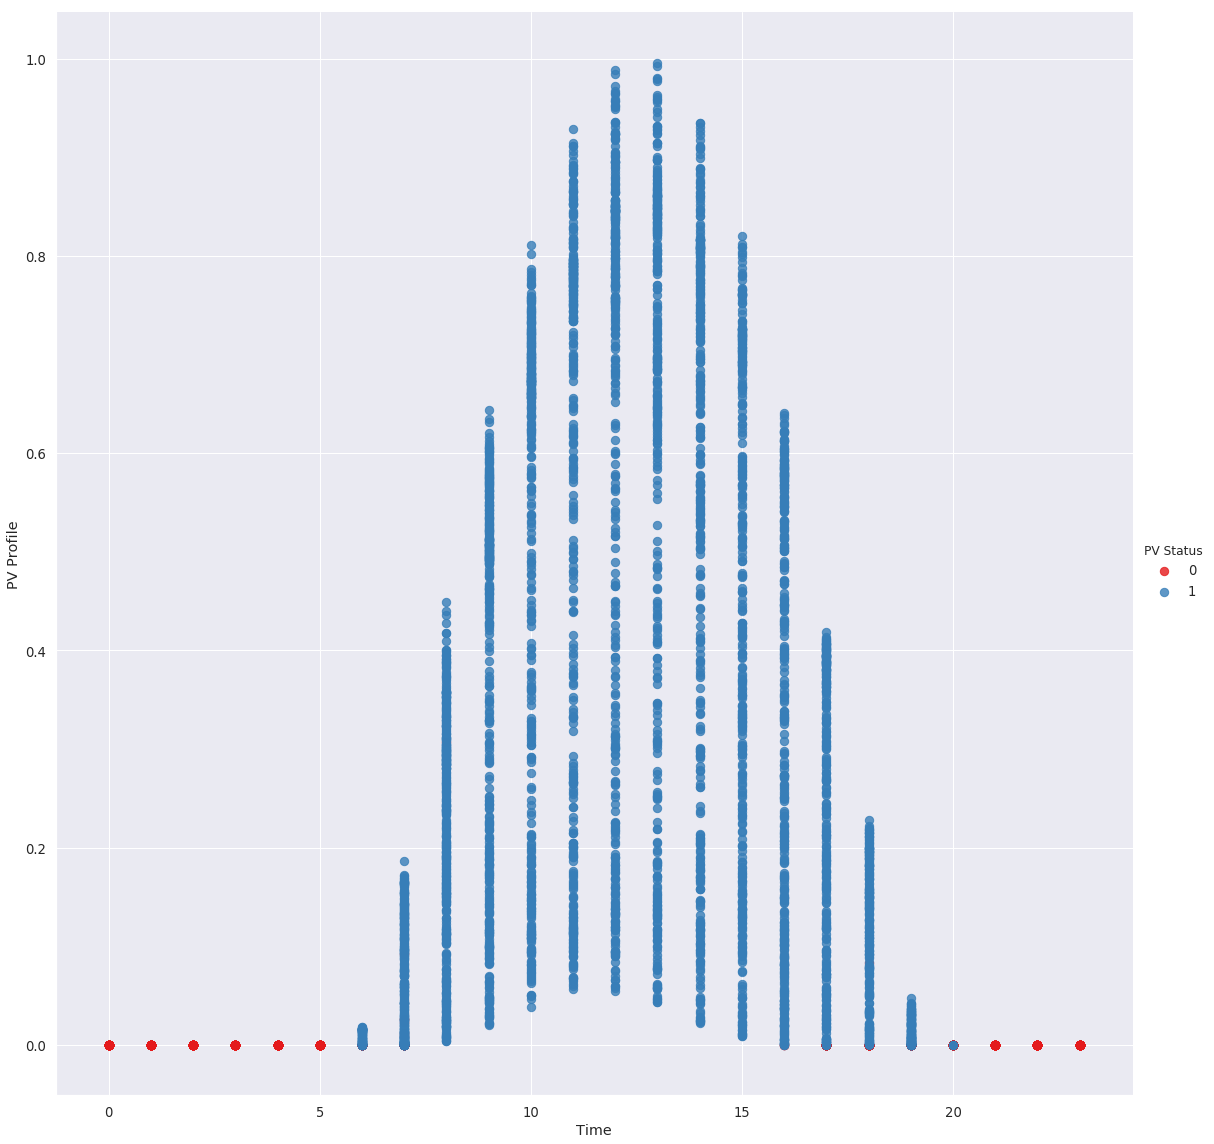

In [12]:
# Plot two parameters (Time vs KW)
sns.lmplot('Time','PV Profile', data=pv, hue='PV Status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=16);

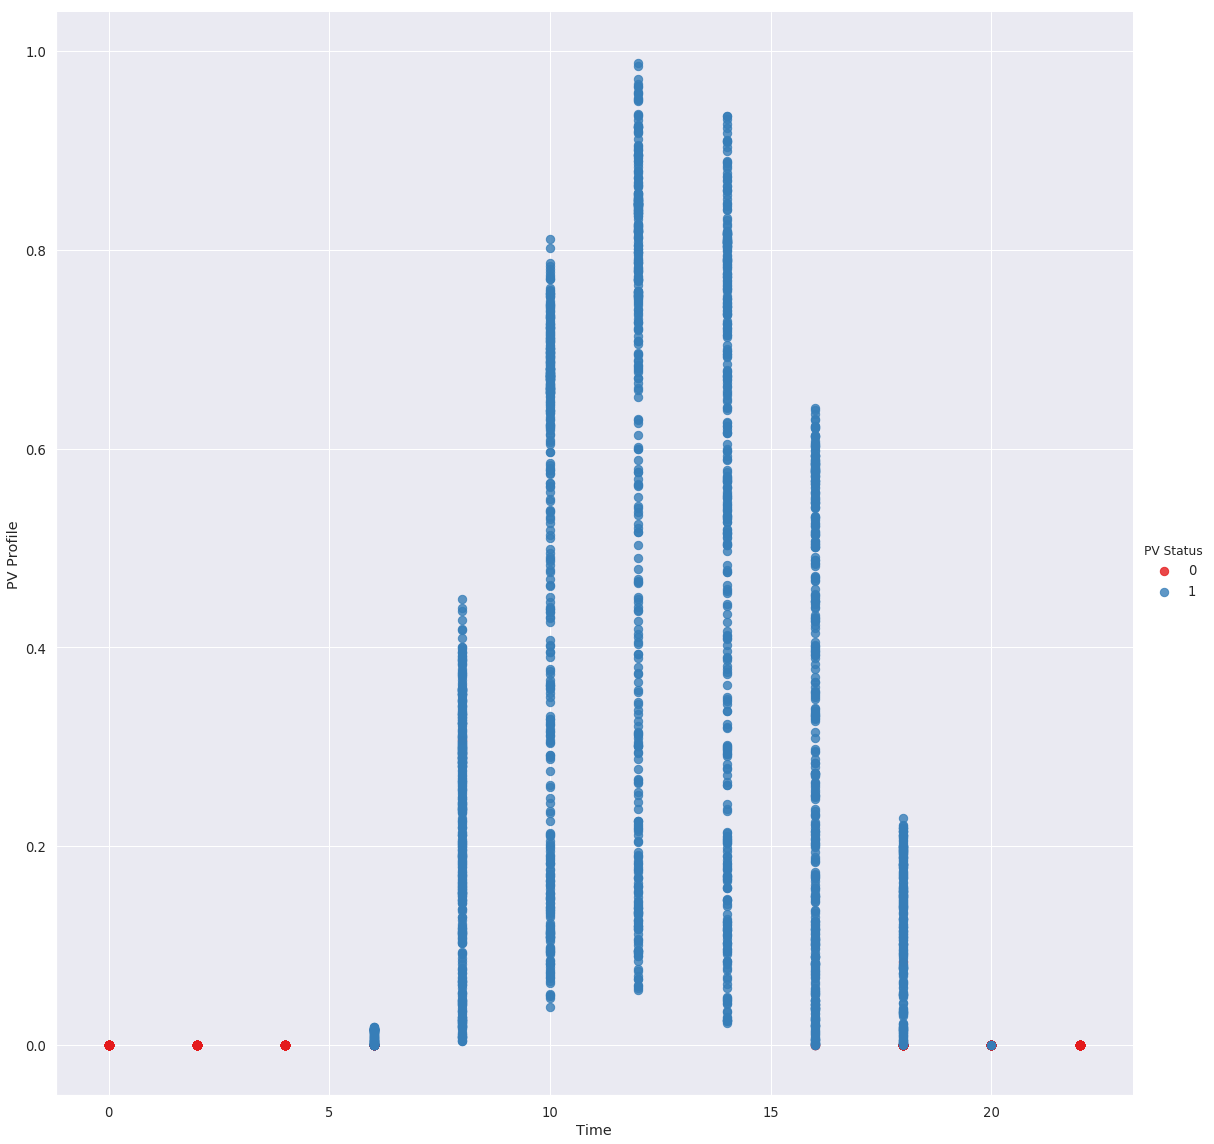

In [13]:
# Plot two parameters (Time vs KW)
# Half Data
sns.lmplot('Time','PV Profile', data=pv_half, hue='PV Status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=16);

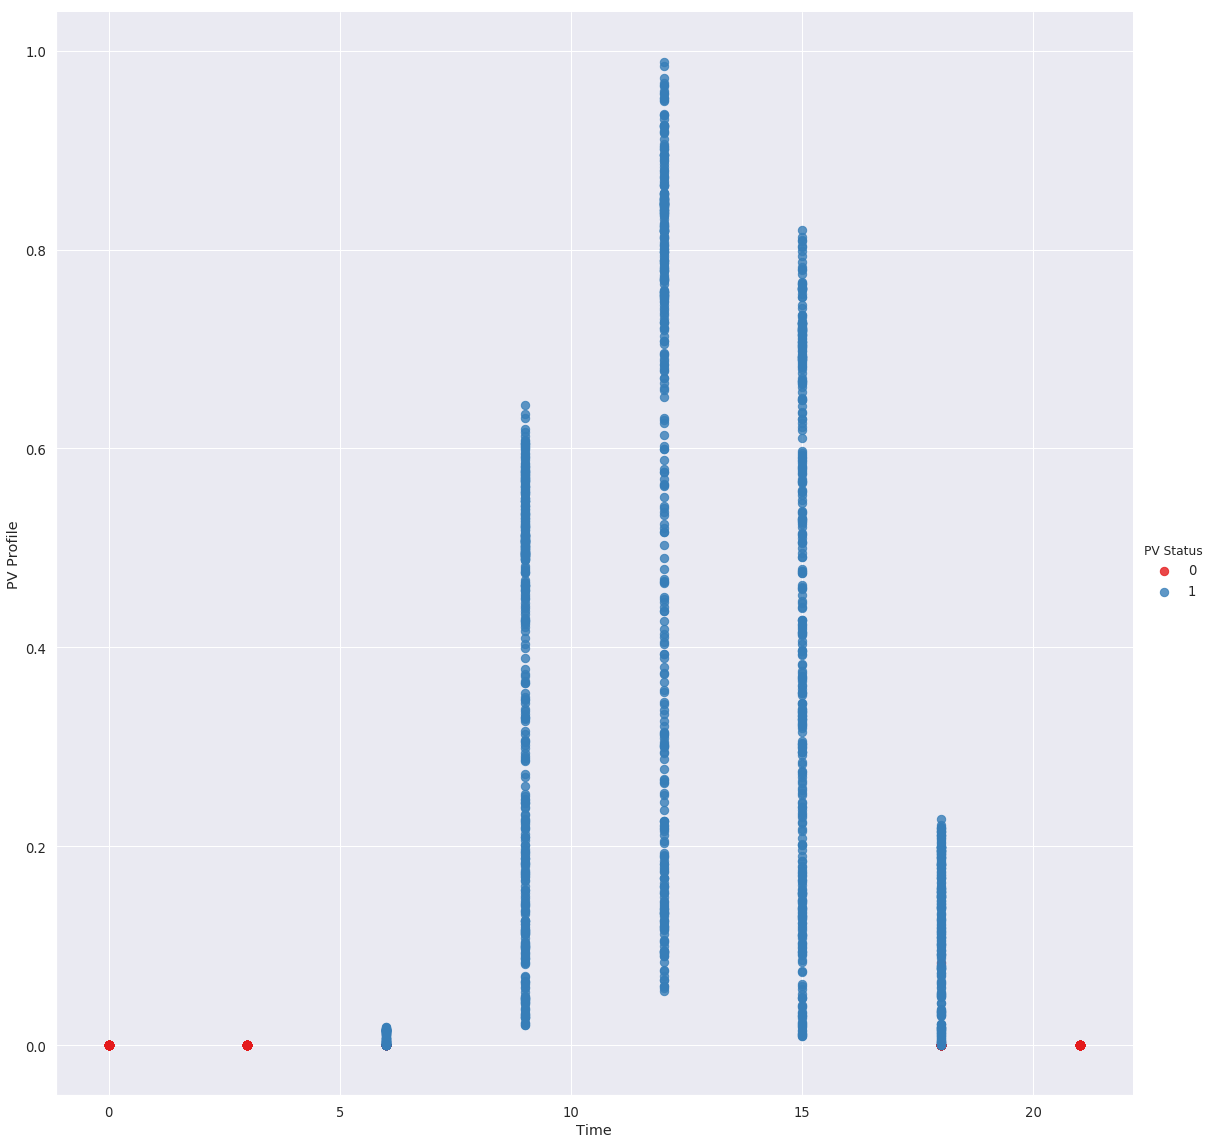

In [14]:
# Plot two parameters (Time vs KW)
# Third Data
sns.lmplot('Time','PV Profile', data=pv_third, hue='PV Status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=16);

## Train & Test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y = pv.drop(['Time','PV Profile'], axis = 'columns')

In [17]:
X = pv.drop(['PV Status'], axis = 'columns')

In [18]:
X.head()

,Time,PV Profile
0,0.0,0.0
1,1.0,0.0
2,2.0,0.0
3,3.0,0.0
4,4.0,0.0


In [19]:
X.tail()

,Time,PV Profile
8756,20.0,0.0
8757,21.0,0.0
8758,22.0,0.0
8759,23.0,0.0
8760,0.0,0.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 42)

In [21]:
# Check the shape of the DataFrame (rows and columns)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (7446, 2)
y_train shape: (7446, 1)


In [22]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (1315, 2)
y_test shape: (1315, 1)


In [23]:
# Specify inputs for the model
# parameters = pv(['Time','PV Profile']).as_matrix()
parameters = pv[['Time','PV Profile']].as_matrix()
pvstatus_label = np.where(pv['PV Status'], 1, 0)

# System Features
system_features = pv.columns.values[1:].tolist()
system_features

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


['PV Profile', 'PV Status']

In [24]:
# Fit the SVM model
# kernel : string, optional (default='rbf')
    #Specifies the kernel type to be used in the algorithm.
    #It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
    #a callable.
    #If none is given, 'rbf' will be used. If a callable is given it is
    #used to pre-compute the kernel matrix from data matrices; that matrix
    #should be an array of shape ``(n_samples, n_samples)``.
model = svm.SVC(kernel='linear', C=10)
model.fit(parameters, pvstatus_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
model.score(X_test,y_test)

0.9543726235741445

## Logistic Regression

In [26]:
X_new = [[7,0.0041],[12,0.57],[17,0.17],[19,0.0035]]

In [27]:
# Import the Class
from sklearn.linear_model import LogisticRegression

In [28]:
# Instantiate the model
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X,y)

# Predict the response for new observations
logreg.predict(X_new)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0])

## Regression

In [30]:
# Linear Regression
linear_regression_model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
# Get the prediction of the model from the data it has not seen (testing)
y_pred_test = linear_regression_model.predict(X_test)

In [31]:
# All metrics compare how close are the predicted vs the actual values
error_metric = mean_squared_error(y_pred_test, y_test)
print('Mean square error of the model:',error_metric)

Mean square error of the model: 0.13470317713790964


Text(0.5, 1.0, 'Predicted vs Actual Values')

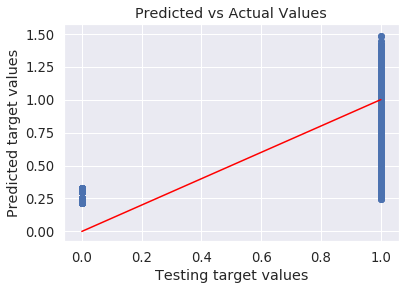

In [36]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred_test)
ax.plot(y_test,y_test,color='red')
ax.set_xlabel('Testing target values')
ax.set_ylabel('Predicted target values')
ax.set_title('Predicted vs Actual Values')

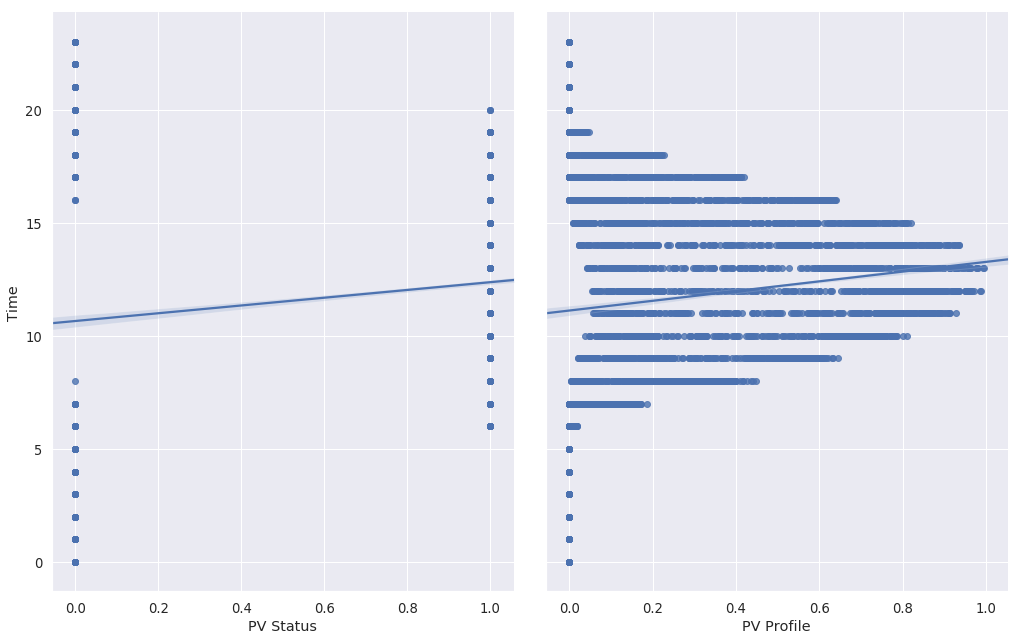

In [37]:
# Visualize the relationship between the features and PV status using scatterplots
sns.pairplot(pv, x_vars=['PV Status', 'PV Profile'], y_vars='Time', height=9, aspect=0.8, kind='reg')